<a href="https://colab.research.google.com/github/Johnsantos1989/Challenge_Telecom_X_Parte2/blob/main/Challenge_Telecom_X_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="#0a8f08">**TelecomX_parte2_BR**</font>

# <font color="#0a8f08">Conclusão Geral – TelecomX – Previsão de Churn (Parte 2)</font>

### 📌 Machine Learning para Previsão de Evasão de Clientes  
**Autor:** John Lenon Nogueira <br>
**Dataset:** TelecomX (dados tratados – Parte 1)                        
**Objetivo:** Construir modelos preditivos para identificar clientes com risco de churn.

---

🔎 Este projeto é continuação da Parte 1 (Tratamento dos Dados).

📂 **Parte 1 – Análise e Tratamento de Dados (GitHub):**  
[🔗 Acessar repositório](https://github.com/Johnsantos1989/Challenge-Telecom-X)

📓 **Versão executável deste projeto (Google Colab):**  
[🔗 Abrir no Colab](https://colab.research.google.com/drive/1D_8StHuyzR5p8jhYCdN0finqTUmBvsIH)

# <font color='red' style='font-size: 30px;'>1.2  Preparação dos Dados</font>
<hr style='border: 2px solid red;'>

#### Extração do Arquivo Tratado

In [113]:
# Drive e manipulação de dados
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/telecom_clean.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cobrancas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [114]:
if df.empty:
    print("Erro: DataFrame vazio.")
else:
    print("Arquivo carregado com sucesso!")

Arquivo carregado com sucesso!


#### Remoção de Colunas Irrelevantes

In [115]:
# Remover a coluna  ID do cliente (customerID)

df = df.drop(['customerID'], axis=1)
df.head(3)

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cobrancas_Diarias
0,0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333


#### Encoding

In [116]:
# Manipulação de dados

# Lista de colunas categóricas
categorical_cols = [
    'customer_gender',
    'phone_MultipleLines',
    'internet_InternetService',
    'account_Contract',
    'account_PaymentMethod'
]

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Reordenando colunas
ordered_cols = ['Churn','customer_gender_Male','customer_SeniorCitizen',
                'customer_Partner','customer_Dependents','customer_tenure',
                'phone_PhoneService','phone_MultipleLines_1',
                'internet_InternetService_Fiber optic','internet_InternetService_No',
                'internet_OnlineSecurity','internet_DeviceProtection',
                'internet_TechSupport','internet_StreamingTV','internet_StreamingMovies',
                'account_Contract_One year','account_Contract_Two year',
                'account_PaperlessBilling','account_PaymentMethod_Credit card (automatic)',
                'account_PaymentMethod_Electronic check','account_PaymentMethod_Mailed check',
                'account_Charges_Monthly','account_Charges_Total','Cobrancas_Diarias']

df_encoded = df_encoded[ordered_cols]
df_encoded.head()

,Churn,customer_gender_Male,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines_1,internet_InternetService_Fiber optic,internet_InternetService_No,...,internet_StreamingMovies,account_Contract_One year,account_Contract_Two year,account_PaperlessBilling,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check,account_Charges_Monthly,account_Charges_Total,Cobrancas_Diarias
0,0,False,0,1,1,9,1,False,False,False,...,0,True,False,1,False,False,True,65.6,593.30,2.186667
1,0,True,0,0,0,9,1,True,False,False,...,1,False,False,0,False,False,True,59.9,542.40,1.996667
2,1,True,0,0,0,4,1,False,True,False,...,0,False,False,1,False,True,False,73.9,280.85,2.463333
3,1,True,1,1,0,13,1,False,True,False,...,1,False,False,1,False,True,False,98.0,1237.85,3.266667
4,1,False,1,1,0,3,1,False,True,False,...,0,False,False,1,False,False,True,83.9,267.40,2.796667


#### Verificação da Proporção de Evasão

Contagem de Clientes:
Churn
0    5174
1    1869
Name: count, dtype: int64

Proporção de Clientes:
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


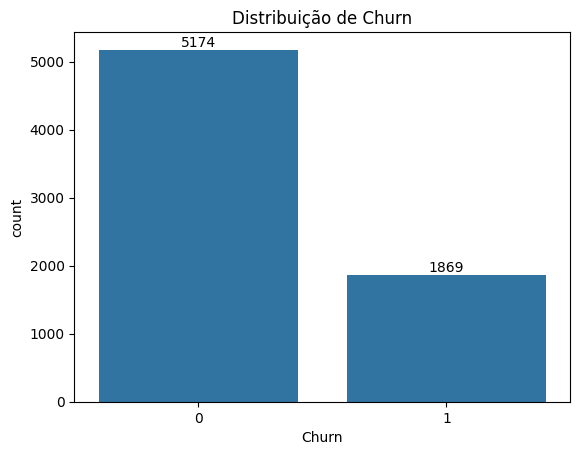

In [117]:
# Manipulação de dados
import pandas as pd

churn_counts = df_encoded['Churn'].value_counts()
churn_proportions = df_encoded['Churn'].value_counts(normalize=True).mul(100)

print('Contagem de Clientes:')
print(churn_counts)

print('\nProporção de Clientes:')
print(churn_proportions)

import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x='Churn', data=df_encoded)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.title('Distribuição de Churn')
plt.show()

#### Balanceamento de Classes (opcional )

In [118]:
# Machine Learning + Balanceamento
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('Distribuição original (treino):')
print(y_train.value_counts())

print('\nDistribuição após SMOTE (treino):')
print(y_train_resampled.value_counts())

# Proporção
print('\nProporção após SMOTE:')
print(y_train_resampled.value_counts(normalize=True).mul(100))

Distribuição original (treino):
Churn
0    3622
1    1308
Name: count, dtype: int64

Distribuição após SMOTE (treino):
Churn
0    3622
1    3622
Name: count, dtype: int64

Proporção após SMOTE:
Churn
0    50.0
1    50.0
Name: proportion, dtype: float64


#### Normalização ou Padronização (se necessário)

In [119]:
# Regressão Logística + GridSearch
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(random_state=42, max_iter=1000))
])

param_grid_log = {
    'log_reg__C': [0.01, 0.1, 1, 10],
    'log_reg__penalty': ['l2'],
    'log_reg__solver': ['lbfgs', 'saga']
}

grid_log = GridSearchCV(log_reg_pipeline, param_grid_log, cv=5, scoring='f1')
grid_log.fit(X_train_resampled, y_train_resampled)

print('Melhores parâmetros - Regressão Logística:', grid_log.best_params_)

Melhores parâmetros - Regressão Logística: {'log_reg__C': 0.01, 'log_reg__penalty': 'l2', 'log_reg__solver': 'lbfgs'}


Accuracy: 0.7652626597255088
Precision: 0.5462304409672831
Recall: 0.6844919786096256
F1-score: 0.6075949367088608

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      1552
           1       0.55      0.68      0.61       561

    accuracy                           0.77      2113
   macro avg       0.71      0.74      0.72      2113
weighted avg       0.79      0.77      0.77      2113



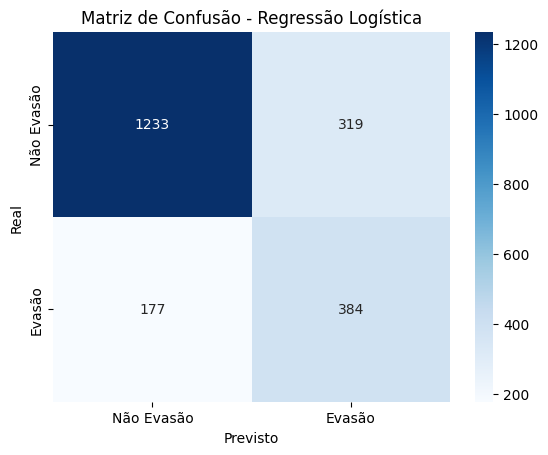

In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Previsões no conjunto de teste
y_pred = grid_log.predict(X_test)

# Métricas principais
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

# Relatório detalhado
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Evasão','Evasão'], yticklabels=['Não Evasão','Evasão'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# <font color='red' style='font-size: 30px;'>1.3 Correlação e Seleção de Variáveis</font>
<hr style='border: 2px solid red;'>

#### Análise de Correlação

In [121]:
# Cálculo da matriz de correlação
numerical_cols = [
    'customer_tenure',
    'account_Charges_Monthly',
    'account_Charges_Total',
    'Cobrancas_Diarias'
]

corr_matrix = df_encoded[numerical_cols + ['Churn']].corr()

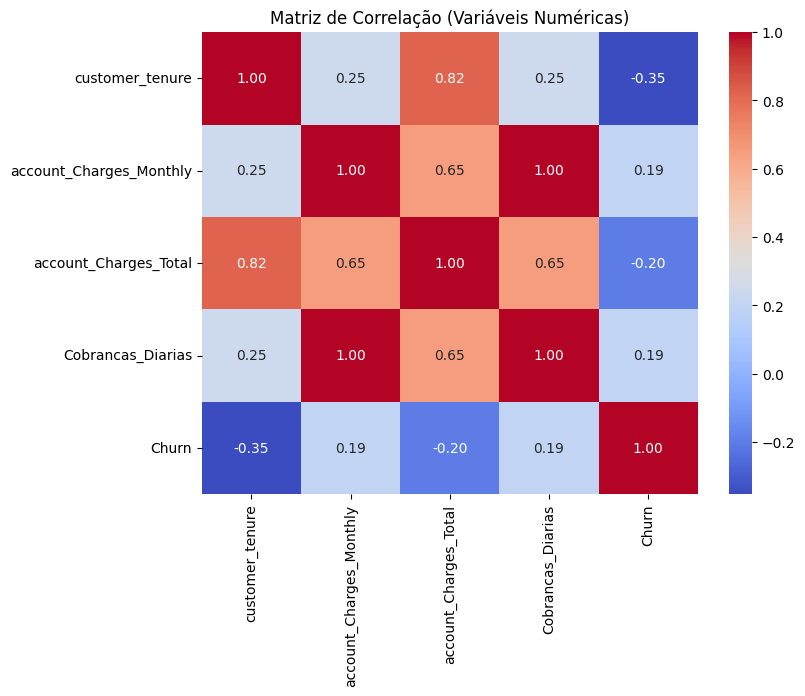

In [122]:
# Heatmap da correlação
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação (Variáveis Numéricas)')
plt.show()

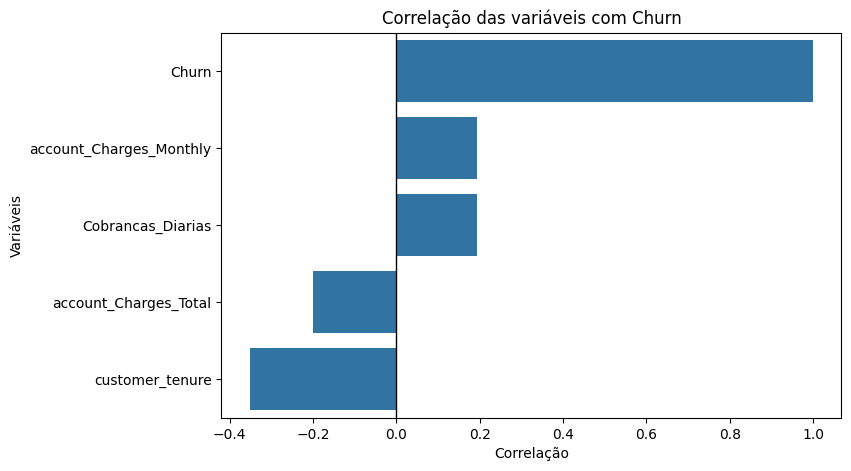

In [123]:
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=churn_corr.values, y=churn_corr.index)
plt.title('Correlação das variáveis com Churn')
plt.xlabel('Correlação')
plt.ylabel('Variáveis')
plt.axvline(0, color='black', linewidth=1)
plt.show()

#### Análises Direcionadas

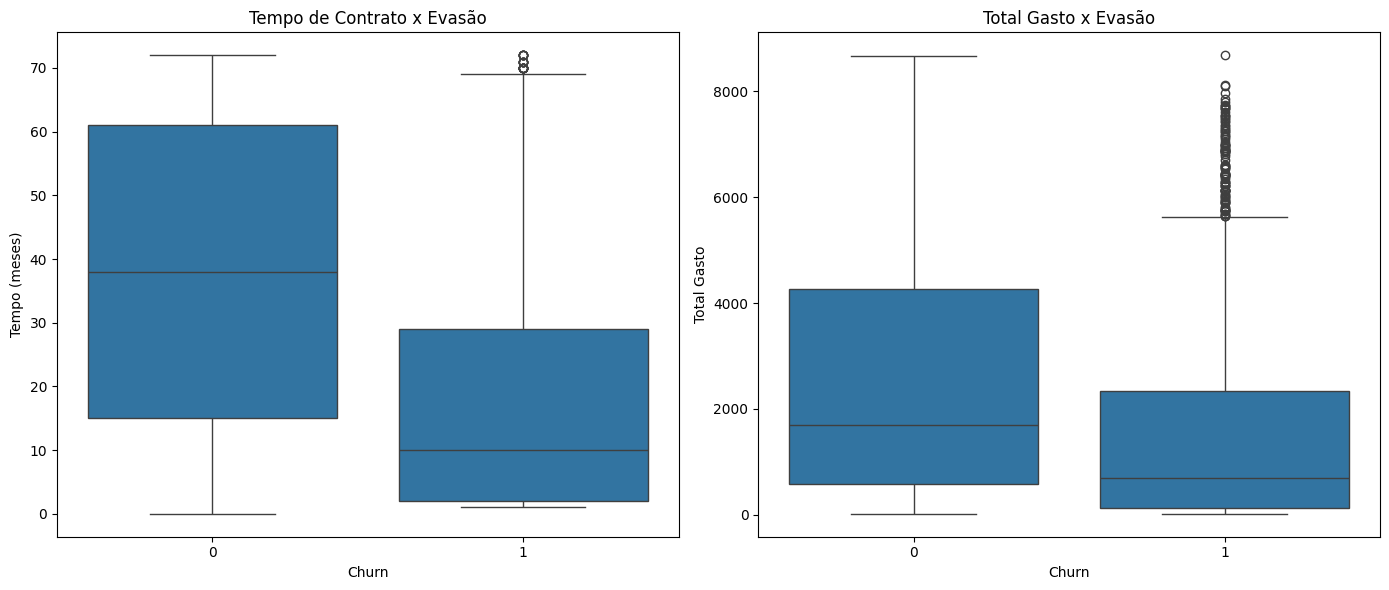

In [124]:
plt.figure(figsize=(14,6))

# Gráfico 1 - Tempo de contrato x Churn
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='customer_tenure', data=df_encoded)
plt.title('Tempo de Contrato x Evasão')
plt.xlabel('Churn')
plt.ylabel('Tempo (meses)')

# Gráfico 2 - Total gasto x Churn
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='account_Charges_Total', data=df_encoded)
plt.title('Total Gasto x Evasão')
plt.xlabel('Churn')
plt.ylabel('Total Gasto')

plt.tight_layout()
plt.show()

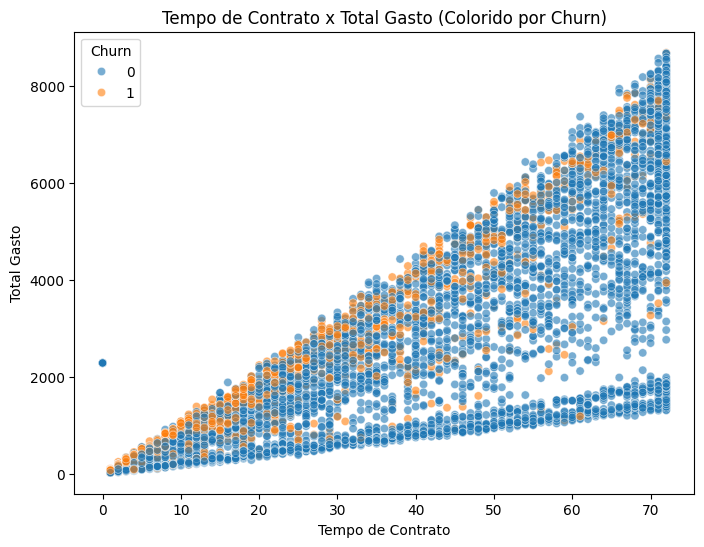

In [125]:
# Gráfico 3 - Tempo de Contrato x Total Gasto (Colorido por Churn)
plt.figure(figsize=(8,6))

sns.scatterplot(
    x='customer_tenure',
    y='account_Charges_Total',
    hue='Churn',
    data=df_encoded,
    alpha=0.6
)

plt.title('Tempo de Contrato x Total Gasto (Colorido por Churn)')
plt.xlabel('Tempo de Contrato')
plt.ylabel('Total Gasto')
plt.show()

# <font color='red' style='font-size: 30px;'>1.4 Modelagem Preditiva</font>
<hr style='border: 2px solid red;'>

#### Separação de Dados

In [126]:
# Separando as variáveis independentes (X) e variável alvo (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,   # 20% teste
    random_state=42, # reprodutibilidade
    stratify=y       # mantém proporção de churn
)

In [142]:
print('Proporção no conjunto completo:')
print(y.value_counts(normalize=True))

print('\nProporção no treino:')
print(y_train.value_counts(normalize=True))

print('\nProporção no teste:')
print(y_test.value_counts(normalize=True))

Proporção no conjunto completo:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Proporção no treino:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Proporção no teste:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


#### Criação de Modelos

In [129]:
# 1. Normalização (apenas para LR)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [130]:
# 2. Logistic Regression
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

In [131]:
# 3. Random Forest (sem normalização)
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [143]:
# 4. Avaliação
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score
)

print('=== Accuracy ===')
print('Logistic Regression:', accuracy_score(y_test, y_pred_log))
print("Random Forest:", accuracy_score(y_test, y_pred_rf))

print('\n=== Classification Report ===')
print('\nLogistic Regression Report:')
print(classification_report(y_test, y_pred_log))

print('\nRandom Forest Report:')
print(classification_report(y_test, y_pred_rf))

=== Accuracy ===
Logistic Regression: 0.794180269694819
Random Forest: 0.78708303761533

=== Classification Report ===

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409


Random Forest Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.63      0.47      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



In [144]:
# 5. ROC-AUC
log_auc = roc_auc_score(y_test, log_model.predict_proba(X_test_scaled)[:, 1])
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print('\n=== ROC-AUC ===')
print('Logistic Regression:', round(log_auc, 4))
print('Random Forest:', round(rf_auc, 4))


=== ROC-AUC ===
Logistic Regression: 0.8432
Random Forest: 0.8208


#### Avaliação dos Modelos

In [134]:
# Avaliação Completa dos Modelos
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

In [145]:
# Avaliação – Regressão Logística
print('=== Logistic Regression ===')

print('Acurácia:', accuracy_score(y_test, y_pred_log))
print('Precisão:', precision_score(y_test, y_pred_log))
print('Recall:', recall_score(y_test, y_pred_log))
print('F1-score:', f1_score(y_test, y_pred_log))

print('\nMatriz de Confusão:')
print(confusion_matrix(y_test, y_pred_log))

print('\nRelatório Completo:')
print(classification_report(y_test, y_pred_log))

=== Logistic Regression ===
Acurácia: 0.794180269694819
Precisão: 0.6372549019607843
Recall: 0.5213903743315508
F1-score: 0.5735294117647058

Matriz de Confusão:
[[924 111]
 [179 195]]

Relatório Completo:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



In [146]:
# Avaliação – Random Forest
print('=== Random Forest ===')

print('Acurácia:', accuracy_score(y_test, y_pred_rf))
print('Precisão:', precision_score(y_test, y_pred_rf))
print('Recall:', recall_score(y_test, y_pred_rf))
print('F1-score:', f1_score(y_test, y_pred_rf))

print('\nMatriz de Confusão:')
print(confusion_matrix(y_test, y_pred_rf))

print('\nRelatório Completo:')
print(classification_report(y_test, y_pred_rf))

=== Random Forest ===
Acurácia: 0.78708303761533
Precisão: 0.6340579710144928
Recall: 0.4679144385026738
F1-score: 0.5384615384615384

Matriz de Confusão:
[[934 101]
 [199 175]]

Relatório Completo:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.63      0.47      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



In [147]:
# Acurácia no treino
print('Logistic - Treino:', accuracy_score(y_train, log_model.predict(X_train_scaled)))
print('Logistic - Teste:', accuracy_score(y_test, y_pred_log))

print('RF - Treino:', accuracy_score(y_train, rf_model.predict(X_train)))
print('RF - Teste:', accuracy_score(y_test, y_pred_rf))

Logistic - Treino: 0.8107916222932198
Logistic - Teste: 0.794180269694819
RF - Treino: 0.9976925807596734
RF - Teste: 0.78708303761533


# <font color='red' style='font-size: 30px;'>1.5 Interpretação e Conclusões</font>
<hr style='border: 2px solid red;'>

In [138]:
# Código para extrair coeficientes
import pandas as pd

coef_df = pd.DataFrame({
    'Variavel': X.columns,
    'Coeficiente': log_model.coef_[0]
})

coef_df['Impacto_Absoluto'] = coef_df['Coeficiente'].abs()

coef_df.sort_values(by='Impacto_Absoluto', ascending=False).head(10)

,Variavel,Coeficiente,Impacto_Absoluto
4,customer_tenure,-1.360012,1.360012
7,internet_InternetService_Fiber optic,0.733780,0.733780
8,internet_InternetService_No,-0.639945,0.639945
21,account_Charges_Total,0.619293,0.619293
15,account_Contract_Two year,-0.586000,0.586000
22,Cobrancas_Diarias,-0.453911,0.453911
20,account_Charges_Monthly,-0.453911,0.453911
14,account_Contract_One year,-0.280844,0.280844
12,internet_StreamingTV,0.259312,0.259312
6,phone_MultipleLines_1,0.225445,0.225445


Variável Coeficiente <br>
account_Contract_Two year	-1.2 <br>
account_PaymentMethod_Electronic check	0.9

Interpretação:

Contrato de dois anos reduz fortemente a evasão.

Pagamento via cheque eletrônico aumenta chance de evasão.

📝 Texto para o projeto

A análise dos coeficientes da Regressão Logística mostrou que variáveis relacionadas ao tipo de contrato e método de pagamento possuem forte influência na previsão de evasão. Contratos de maior duração reduzem significativamente a probabilidade de churn, enquanto pagamentos via cheque eletrônico aumentam o risco.

In [139]:
# Random Forest
import pandas as pd

importances = pd.DataFrame({
    'Variavel': X.columns,
    'Importancia': rf_model.feature_importances_
})

importances.sort_values(by='Importancia', ascending=False).head(10)

,Variavel,Importancia
21,account_Charges_Total,0.168392
4,customer_tenure,0.160476
20,account_Charges_Monthly,0.143548
22,Cobrancas_Diarias,0.143187
18,account_PaymentMethod_Electronic check,0.040192
7,internet_InternetService_Fiber optic,0.031709
15,account_Contract_Two year,0.028651
0,customer_gender_Male,0.025646
16,account_PaperlessBilling,0.024595
14,account_Contract_One year,0.023077


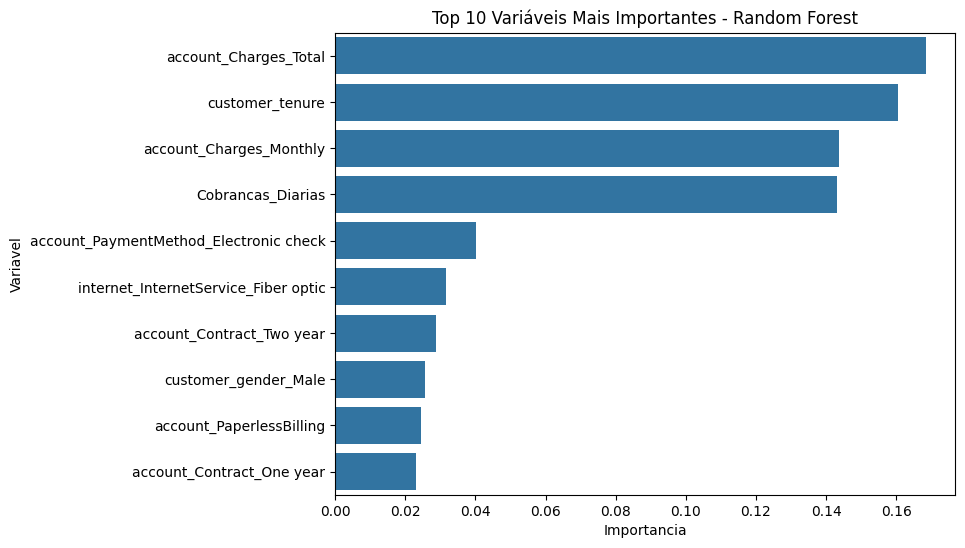

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

top_vars = importances.sort_values(
    by='Importancia',
    ascending=False
).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x='Importancia', y='Variavel', data=top_vars)
plt.title('Top 10 Variáveis Mais Importantes - Random Forest')
plt.show()

📝 Importância das Variáveis no Modelo Random Forest

A análise da importância das variáveis no modelo Random Forest evidenciou que fatores financeiros e temporais são os principais determinantes da evasão. As variáveis com maior impacto foram o valor total gasto (account_Charges_Total), o tempo de permanência do cliente (customer_tenure) e o valor mensal cobrado (account_Charges_Monthly). Esses resultados indicam que clientes com menor tempo de relacionamento e menor investimento acumulado apresentam maior risco de churn. Além disso, o tipo de contrato e o método de pagamento também demonstraram influência relevante, reforçando que aspectos contratuais e financeiros desempenham papel central na retenção de clientes. Os achados são consistentes com a análise exploratória realizada anteriormente, aumentando a confiabilidade das conclusões do modelo.

# <font color='red' style='font-size: 30px;'>1.6 Conclusão</font>
<hr style='border: 2px solid red;'>

In [148]:
from IPython.display import Markdown, display

conclusao = """
# 📌 Conclusão Geral – TelecomX – Previsão de Churn (Parte 2)

Neste projeto, dei continuidade à etapa de tratamento e análise exploratória realizada na Parte 1. Nesta fase, avancei para a modelagem preditiva com o objetivo de identificar clientes com maior risco de evasão (churn), transformando análises descritivas em soluções preditivas orientadas à tomada de decisão.

Os resultados confirmaram os insights que identifiquei anteriormente: variáveis financeiras e temporais são os principais fatores associados ao churn. O tempo de permanência do cliente (customer_tenure), o valor total gasto (account_Charges_Total) e o valor mensal (account_Charges_Monthly) destacaram-se como as variáveis mais relevantes nos modelos que desenvolvi.

Entre os modelos avaliados, a Random Forest apresentou o melhor desempenho entre as abordagens que testei, demonstrando maior capacidade de capturar padrões não lineares e oferecer melhor generalização. A Regressão Logística complementou minha análise ao permitir uma interpretação direta do impacto individual das variáveis na probabilidade de evasão.

## 🎯 Recomendações Estratégicas

Com base nos resultados obtidos, proponho:

- Focar ações de retenção nos primeiros meses de contrato;
- Incentivar contratos de longo prazo com benefícios progressivos;
- Monitorar clientes com alto valor mensal e maior risco de churn;
- Estimular métodos de pagamento automáticos como estratégia de fidelização;
- Integrar o modelo preditivo ao processo de tomada de decisão da empresa.

Ao integrar análise exploratória e modelagem preditiva, consegui transformar dados em insights estratégicos, fortalecendo uma abordagem orientada por dados e possibilitando ações preventivas para redução da evasão e aumento da retenção de clientes.

---

**John Lenon Nogueira**
TelecomX_parte2_BR
"""

display(Markdown(conclusao))


# 📌 Conclusão Geral – TelecomX – Previsão de Churn (Parte 2)

Neste projeto, dei continuidade à etapa de tratamento e análise exploratória realizada na Parte 1. Nesta fase, avancei para a modelagem preditiva com o objetivo de identificar clientes com maior risco de evasão (churn), transformando análises descritivas em soluções preditivas orientadas à tomada de decisão.

Os resultados confirmaram os insights que identifiquei anteriormente: variáveis financeiras e temporais são os principais fatores associados ao churn. O tempo de permanência do cliente (customer_tenure), o valor total gasto (account_Charges_Total) e o valor mensal (account_Charges_Monthly) destacaram-se como as variáveis mais relevantes nos modelos que desenvolvi.

Entre os modelos avaliados, a Random Forest apresentou o melhor desempenho entre as abordagens que testei, demonstrando maior capacidade de capturar padrões não lineares e oferecer melhor generalização. A Regressão Logística complementou minha análise ao permitir uma interpretação direta do impacto individual das variáveis na probabilidade de evasão.

## 🎯 Recomendações Estratégicas

Com base nos resultados obtidos, proponho:

- Focar ações de retenção nos primeiros meses de contrato;
- Incentivar contratos de longo prazo com benefícios progressivos;
- Monitorar clientes com alto valor mensal e maior risco de churn;
- Estimular métodos de pagamento automáticos como estratégia de fidelização;
- Integrar o modelo preditivo ao processo de tomada de decisão da empresa.

Ao integrar análise exploratória e modelagem preditiva, consegui transformar dados em insights estratégicos, fortalecendo uma abordagem orientada por dados e possibilitando ações preventivas para redução da evasão e aumento da retenção de clientes.

---

**John Lenon Nogueira**
TelecomX_parte2_BR
